## Answer 1

In [3]:
library(quantmod)
options("getSymbols.warning4.0"=FALSE)

stocks <- c('BAC', 'CHK', 'PFE')          # stock names of the stocks to be evaluated
data <- sapply(stocks, function(x) {      # fetch the adjusted stock prices from yahoo 
    getSymbols(x, src = "yahoo", from = "1991-01-01", to = "2016-01-01", auto.assign=FALSE)[, 6]
})

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


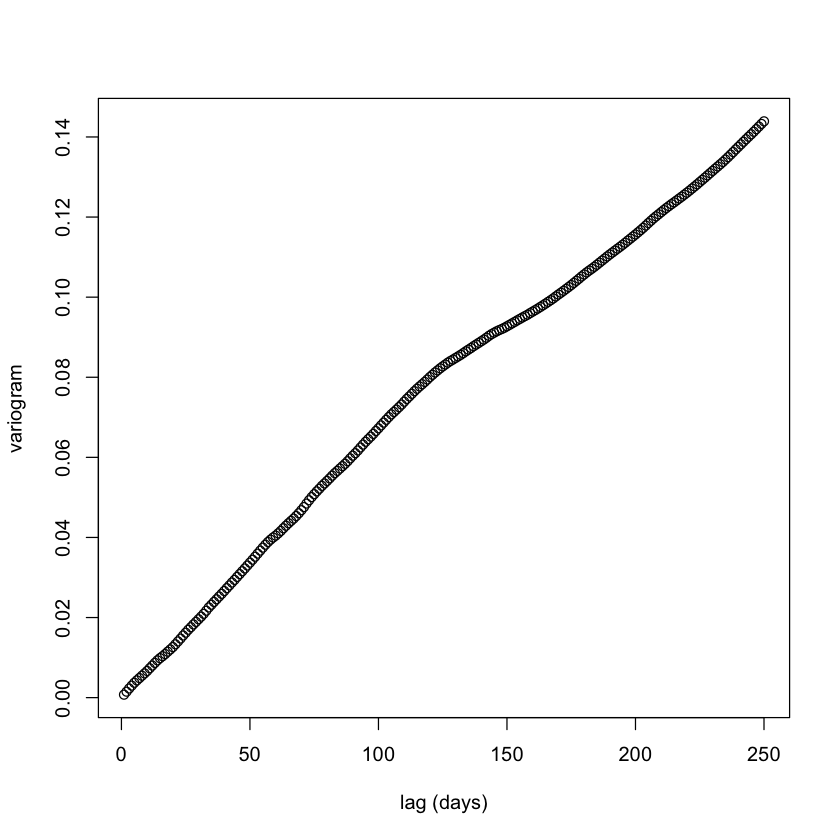

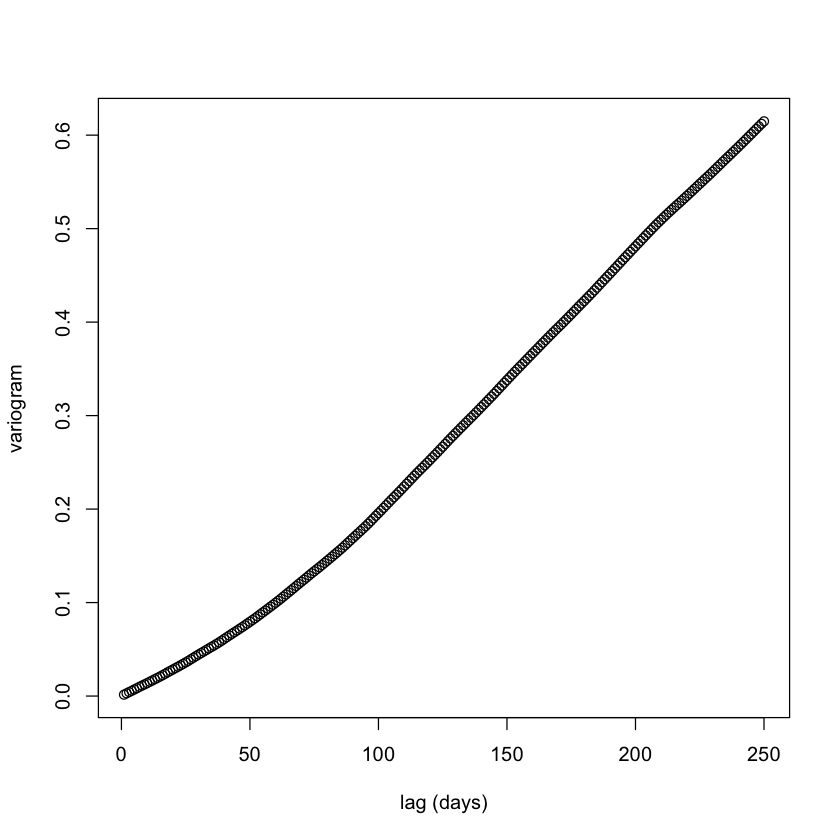

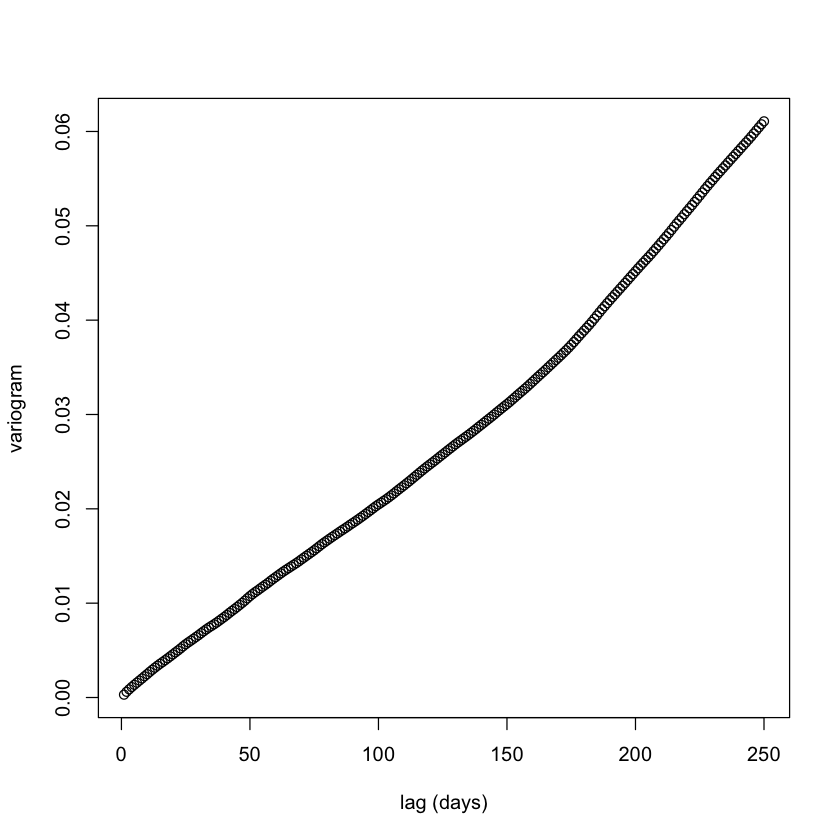

In [4]:
rv <- lapply(data, function(x) {         # plot the return varience as a function of days (1 to 250)
    variogram <- vector("numeric", 250)
    for(lag in 1:250) variogram[lag] <- var(diff(log(as.vector(x)),lag))
    plot(variogram, xlab = "lag (days)")
})

#### The plots seem to be a bit like straight lines, therefore, stock returns may follow random walks. The variogram is an estimate of the the varience of price returns at different return intervals. The two quantities are the same when the varience is in fact linearly related to the time.

## Answer 2

In [5]:
stocks <- c('INTC', 'AMD')                # stock names of the stocks to be evaluated
data <- sapply(stocks, function(x) {      # fetch the adjusted stock prices from yahoo 
    as.numeric(getSymbols(x, src = "yahoo", from = "2006-01-01", to = "2016-01-01", auto.assign=FALSE)[, 6])
})

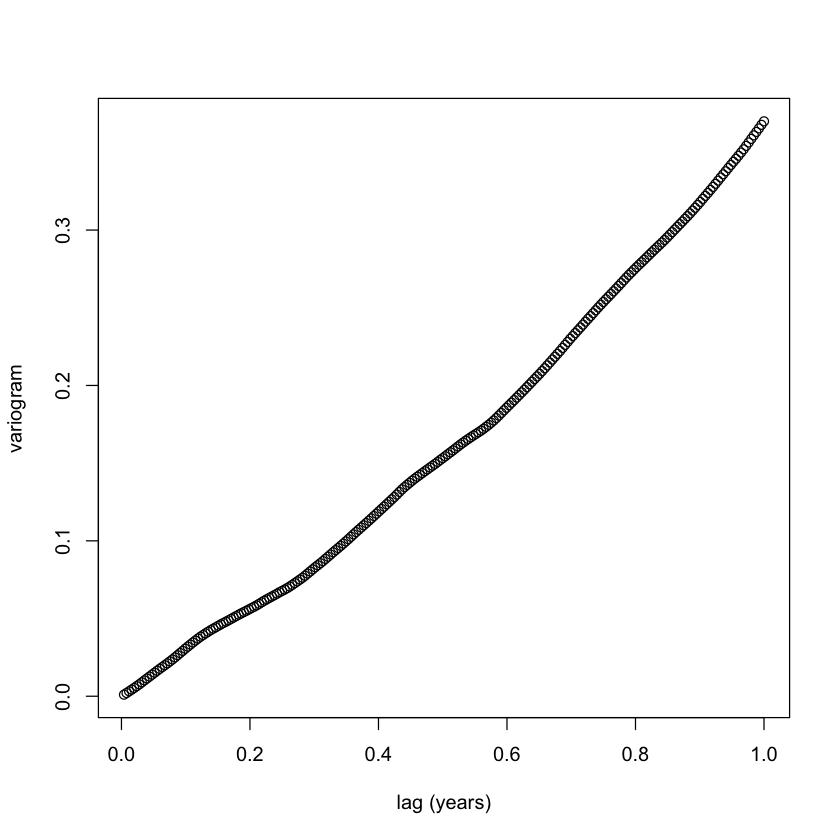

In [6]:
X <- data[, 2]/data[, 1]
variogram <- vector("numeric", 252)
for(lag in 1:252) {
    variogram[lag] <- mean(abs( (diff(log(X),lag))^2 ))
}
plot(x=((1:252)/252), y=variogram, xlab = "lag (years)")

#### Seems to be a straight line, therefore, X might be predictable.

## Answer 3

In [7]:
dtb3 <- read.csv("DTB3.csv",header=TRUE,as.is=TRUE)

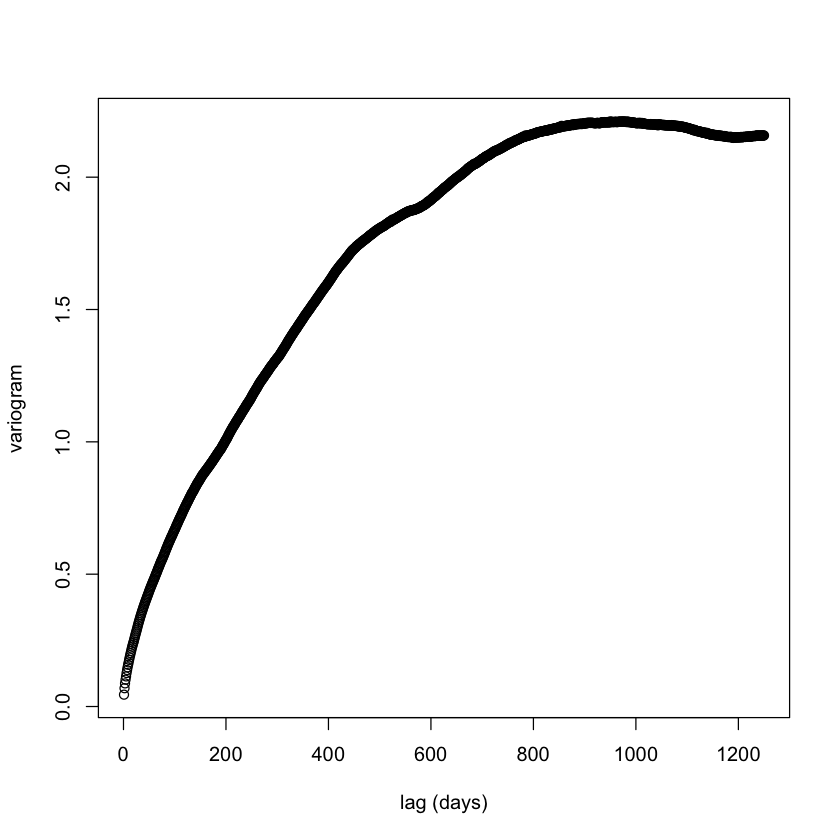

In [8]:
variogram <- vector("numeric", 1250)
suppressWarnings(for(lag in 1:1250) variogram[lag] <- mean(abs(diff(as.numeric(dtb3$VALUE),lag)), na.rm = TRUE))
plot(variogram, xlab = "lag (days)")

#### The plot shows that there are charachterstics are mean reverting after around 600 days, that is, 2.5 years.

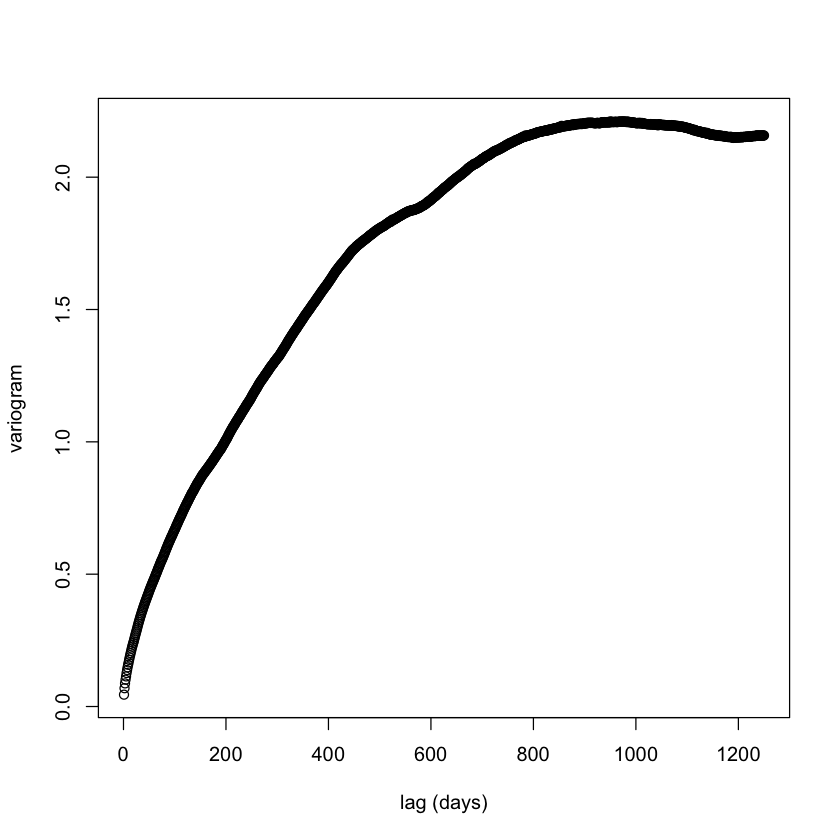

In [17]:
variogram <- vector("numeric", 250)
# because r is not lognormal, I don't take log returns squared
suppressWarnings(for(lag in 1:1250) variogram[lag] <- mean(abs(diff(as.numeric(dtb3$VALUE),lag)), na.rm = TRUE))
plot(variogram, xlab = "lag (days)")